In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def distance_calc(param):
    if(param==1):
        #Euclidean Distance
        for i in validate_images:
            for j in train_images:
                euclid_distance=np.sum((i-j)**2)
                distances.append(euclid_distance)
                
    else:
        #Manhattan Distance
        for i in validate_images:
          for j in train_images:
            manhatten_distance=np.sum(abs(i-j))
            distances.append(manhatten_distance)

In [0]:
def predict_number(list_k):
    votes={}
    for i in range(len(list_k)):
        response=list_k[i][1];
        if(response in votes):
            votes[response]+=1
        else:
            votes[response]=1
    # print(votes)
    sorted_votes=sorted(votes.items(),key=lambda item: item[1])
    # print(sorted_votes)
    return sorted_votes[len(sorted_votes)-1][0]
    

In [0]:
def knn(train_images,train_labels,validate_images,validate_labels,k):
    predicted_list=[]
    list_k=[]
    for i in range(0,len(distances),len(train_images)):
        for j in range(i+0,i+len(train_images)):
            list_k.append((distances[j],train_labels[j%len(train_labels)]))
            if(len(list_k)>k):
                list_k.sort()
                list_k=list_k[:k]
        predicted_list.append(predict_number(list_k))
        list_k.clear()
    # print(len(predicted_list))
    return predicted_list
    # return accuracy_score(validate_labels,predicted_list)
    # for j in range(len(validate_images)):
    #     print(validate_labels[j],predicted_list[j])
    # print("Cluster value:",k,accuracy_score(validate_labels,predicted_list))
    

In [0]:
def sklearn_knn(train_images,train_labels,validate_images,validate_labels):
    score=[]
    kv=[]
    print("Scikit learn KNN Accuracy")
    for k in range(5,25,5):
      knn=KNeighborsClassifier(n_neighbors=k)
      knn.fit(train_images,train_labels)
      predicted_labels=knn.predict(validate_images)
      score.append(accuracy_score(validate_labels,predicted_labels))
      kv.append(k)
    plt.plot(kv,score)
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.show()

In [0]:
filename='./Datasets/q1/train.csv'
data=pd.read_csv(filename,header=None)
# data=data.head(5000)

In [0]:
msk = np.random.rand(len(data)) < 0.8
train_df = data[msk]
validate_df = data[~msk]

In [9]:
len(train_df)

15943

In [10]:
len(validate_df)

4057

In [0]:
train_array=train_df.to_numpy()
train_labels=train_array[:,0]
train_images=train_array[:,1:]

In [0]:
validate_array=validate_df.to_numpy()
validate_labels=validate_array[:,0]
validate_images=validate_array[:,1:]
distances=[]
distance_calc(2)

F1 score :  0.9467586886862214
Confusion Matrix :  [[430   0   0   0   0   2   1   0   1   0]
 [  0 425   0   0   0   0   0   0   0   2]
 [  3  10 405   2   1   1   3  12   0   1]
 [  0   1   5 385   0   5   0   4   0   4]
 [  2   6   0   0 337   0   2   0   0  10]
 [  1   6   0   5   0 333   7   0   0   3]
 [  6   1   1   0   0   1 396   0   1   0]
 [  0   9   1   0   0   0   0 415   0   5]
 [  2   8   5  13   3  13   4   3 309  15]
 [  3   2   0   3   5   0   0  12   0 406]]
F1 score :  0.9420754251910278
Confusion Matrix :  [[429   0   0   0   0   2   2   0   1   0]
 [  0 426   0   0   0   0   0   0   0   1]
 [  5  10 404   1   0   0   4  13   0   1]
 [  0   4   3 384   0   3   0   5   1   4]
 [  0   8   1   0 333   0   3   0   0  12]
 [  0   7   1   8   0 326   7   0   0   6]
 [  5   2   3   0   0   2 393   0   1   0]
 [  0  10   1   0   1   0   0 411   0   7]
 [  3  10   3  11   2  10   4   4 312  16]
 [  4   1   1   3   5   0   0  13   0 404]]
F1 score :  0.9405964998767562
Confu

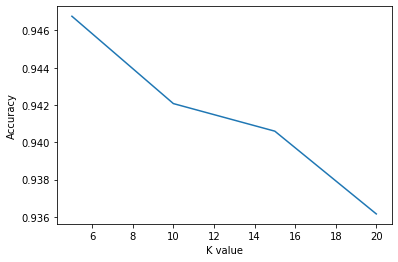

In [13]:
score=[]
kv=[]
for k in range(5,25,5):
  predic=knn(train_images,train_labels,validate_images,validate_labels,k)
  kv.append(k)
  score.append(accuracy_score(validate_labels,predic))
  print('F1 score : ',f1_score(validate_labels,predic,average='micro'))
  print('Confusion Matrix : ',confusion_matrix(validate_labels,predic))
plt.plot(kv,score)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

# Knn Accuracy :
1.Euclidean Distance
> Steps
- k values range was set from 5 to 25 with steps of 5.
- Plotted the graph for multiple values.
- Accuracy started with 95% and took a downward curve against increasing values
- k value of 5 (Accuracy : 95.3)was chosen.

2.Manhatten Distance
> Steps
- k values range was set from 5 to 25 with steps of 5.
- Plotted the graph for multiple values.
- Accuracy started with 94.8% and took a downward curve against increasing values

Scikit learn KNN Accuracy


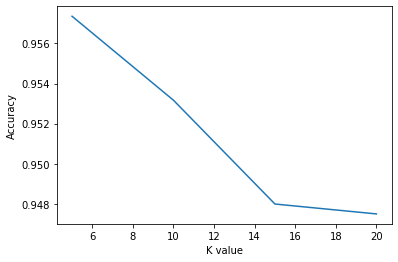

In [14]:
sklearn_knn(train_images,train_labels,validate_images,validate_labels)

#Inbuilt Knn Classifier
For values from 5 to 25 in steps of 5, accuracy started with ~96% followed by decrement in unit percentage values.